In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("exercise.csv")
pd.set_option("display.max_columns",None)

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
df_cal = pd.read_csv("calories.csv")

In [5]:
df_cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
df = pd.merge(df,df_cal,on=df["User_ID"],how="inner")

In [7]:
df.head()

,key_0,User_ID_x,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID_y,Calories
0,14733363,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [8]:
df.drop(columns = ["key_0","User_ID_y"],axis = 1,inplace=True)

In [9]:
df.rename({"User_ID_x":"User_ID"},inplace=True,axis = 1)

In [10]:
df.drop(columns = "User_ID",axis = 1,inplace = True)

In [11]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14999 non-null  object 
 1   Age         14999 non-null  int64  
 2   Height      14999 non-null  float64
 3   Weight      14999 non-null  float64
 4   Duration    14999 non-null  float64
 5   Heart_Rate  14999 non-null  float64
 6   Body_Temp   14999 non-null  float64
 7   Calories    14999 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [16]:
df["Gender"] = df["Gender"].map({"male":0,"female":1})

In [17]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


<AxesSubplot:>

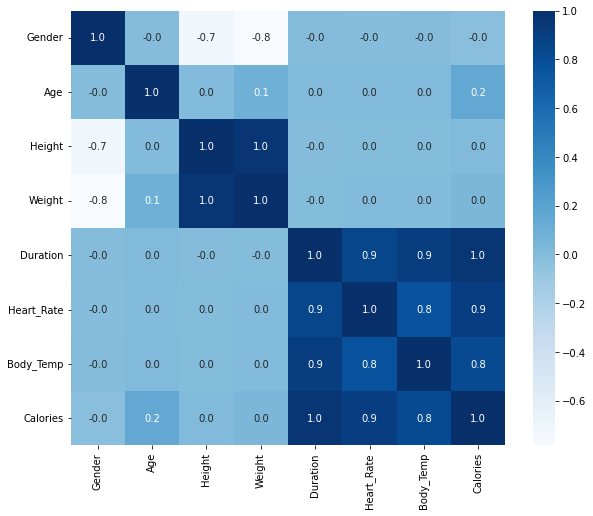

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,square = True,cmap="Blues",fmt = ".1f")

In [19]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values


In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [21]:
X_train

array([[  0. ,  41. , 178. , ...,  25. , 115. ,  40.5],
       [  0. ,  52. , 176. , ...,  26. , 112. ,  40.8],
       [  1. ,  22. , 176. , ...,  12. ,  89. ,  40.3],
       ...,
       [  0. ,  57. , 189. , ...,   8. ,  90. ,  39.5],
       [  0. ,  35. , 174. , ...,  12. ,  97. ,  40.2],
       [  0. ,  26. , 182. , ...,  16. ,  91. ,  40.5]])

In [22]:
Y_train

array([199., 205.,  49., ...,  41.,  57.,  59.])

In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression()

In [24]:
Y_pred = LR.predict(X_test)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error

In [26]:
r2_score(Y_test,Y_pred)

0.9662893783275958

In [27]:
mean_squared_error(Y_test,Y_pred)

130.56442241336148

In [28]:
from sklearn.tree import DecisionTreeRegressor
DCT = DecisionTreeRegressor(criterion = "absolute_error",splitter="best")
DCT.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='absolute_error')

In [29]:
Y_pred_2 = DCT.predict(X_test)

In [30]:
r2_score(Y_test,Y_pred_2)

0.992682681282662

In [31]:
mean_squared_error(Y_test,Y_pred_2)

28.340666666666667

In [32]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
Y_pred_3 = XGB.predict(X_test)

In [34]:
round(r2_score(Y_test,Y_pred_3)*100,2)

99.88

In [35]:
round(mean_squared_error(Y_test,Y_pred_3),2)

4.69

In [102]:
import pickle
pickle.dump(XGB,open("model.pkl","wb"))